In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data =pd.read_csv('/content/diabetes.csv')

In [23]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
data.shape

(768, 9)

In [25]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [27]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


we have seen that from the function data.shape..it gives us (768,9) --> It has 768 rows and 9 --Columns

So now in the data.describe() function it shows that the count for each column =768  this implies ---There are
**NO NULL VALUES **

In [28]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [29]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


Interview Question:

During the Data Imputation,which Method do you follow?
Whether Mean or Median?or which is best option ?

Ans: Median is the best methood.. As it handles Outliers in a Better way..

Mean is not a method if data has outliers

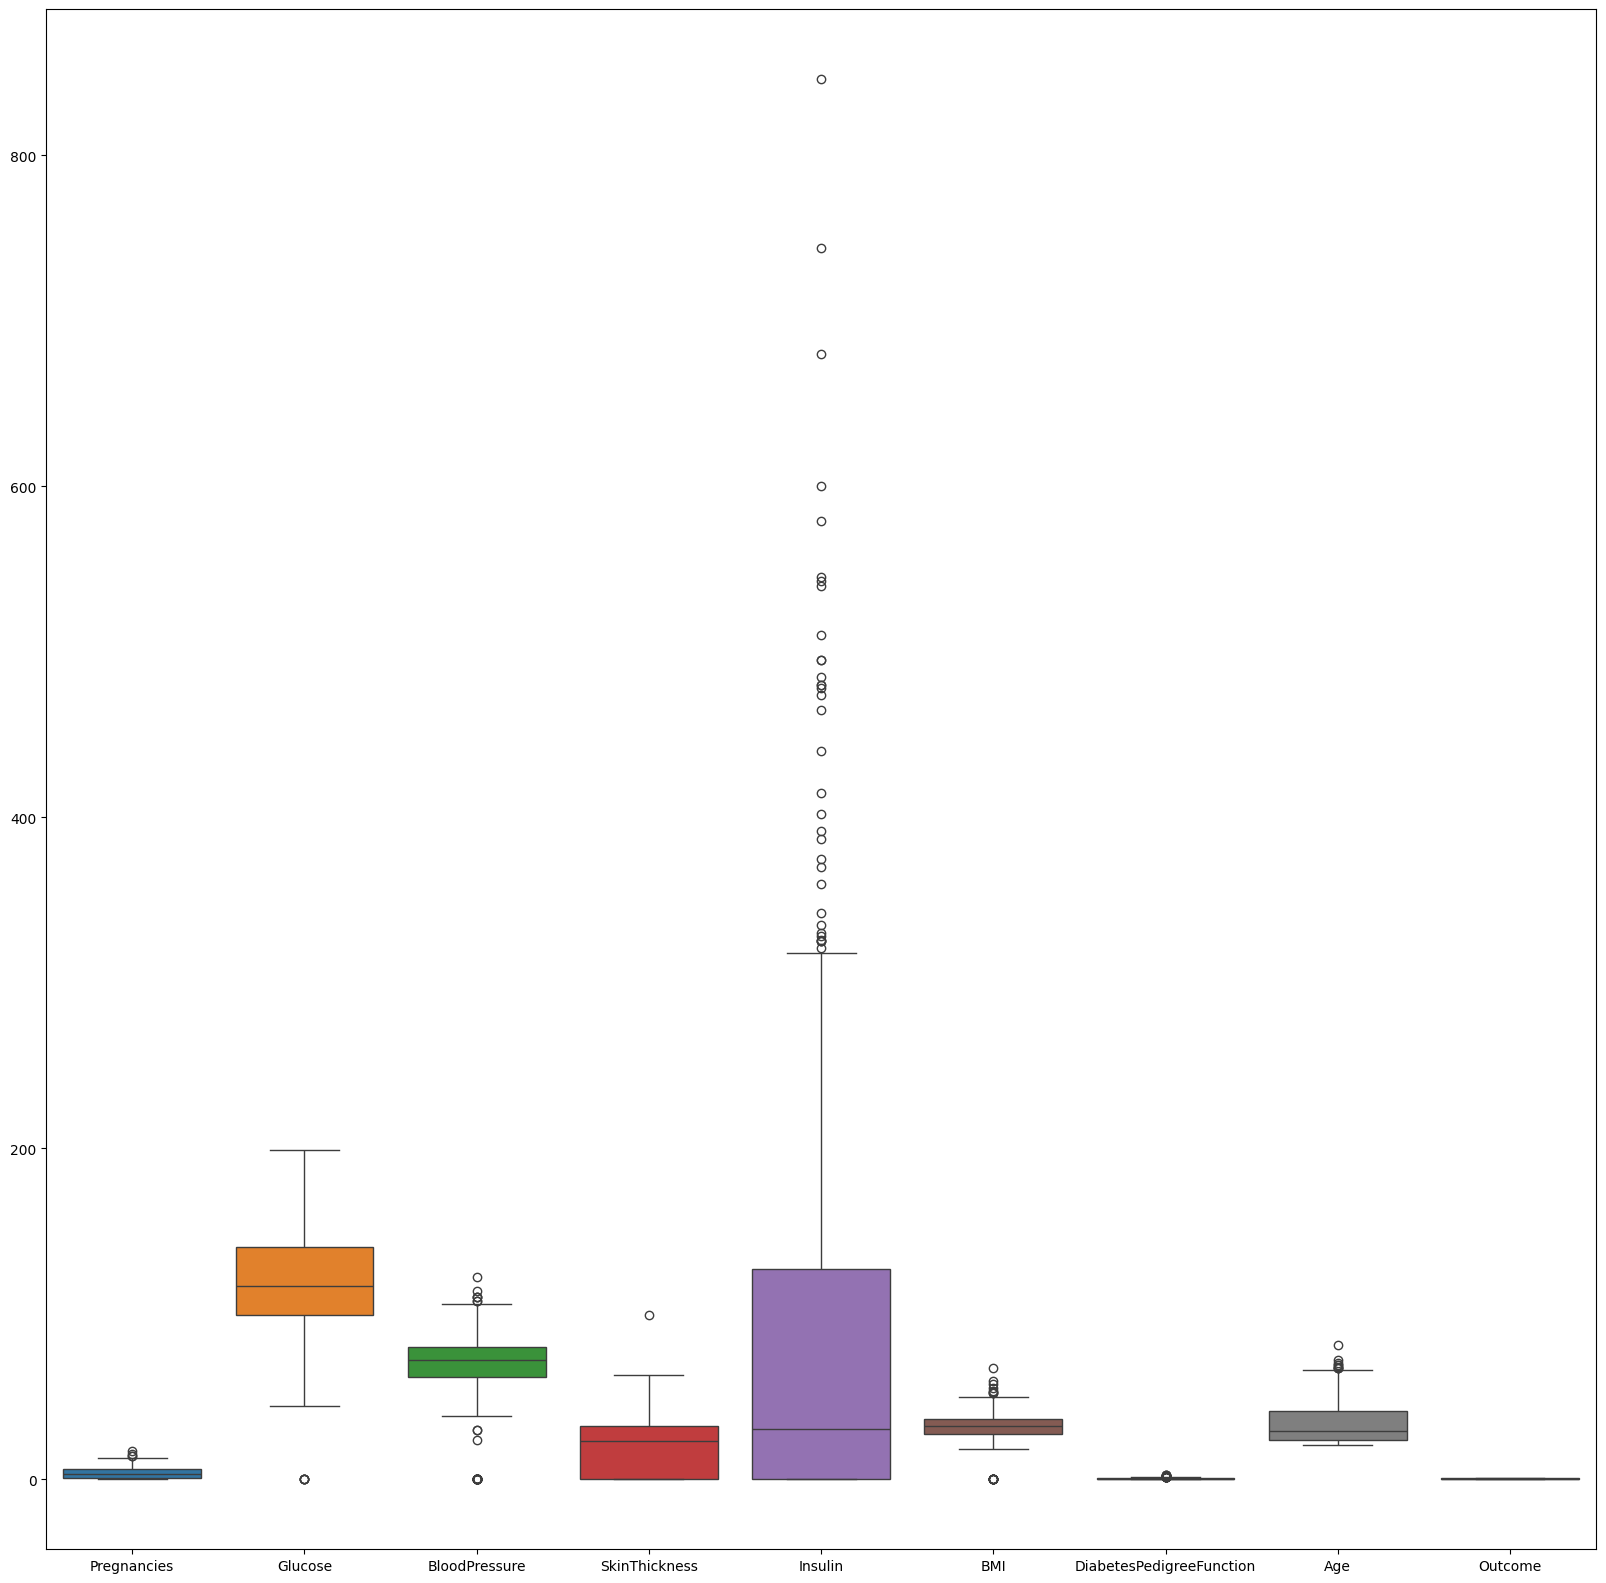

In [30]:
#Create a Box Plot to find the Outliers
fig ,ax= plt.subplots(figsize =(20,20))
sns.boxplot(data=data)
plt.savefig('boxplot.png')

<Axes: >

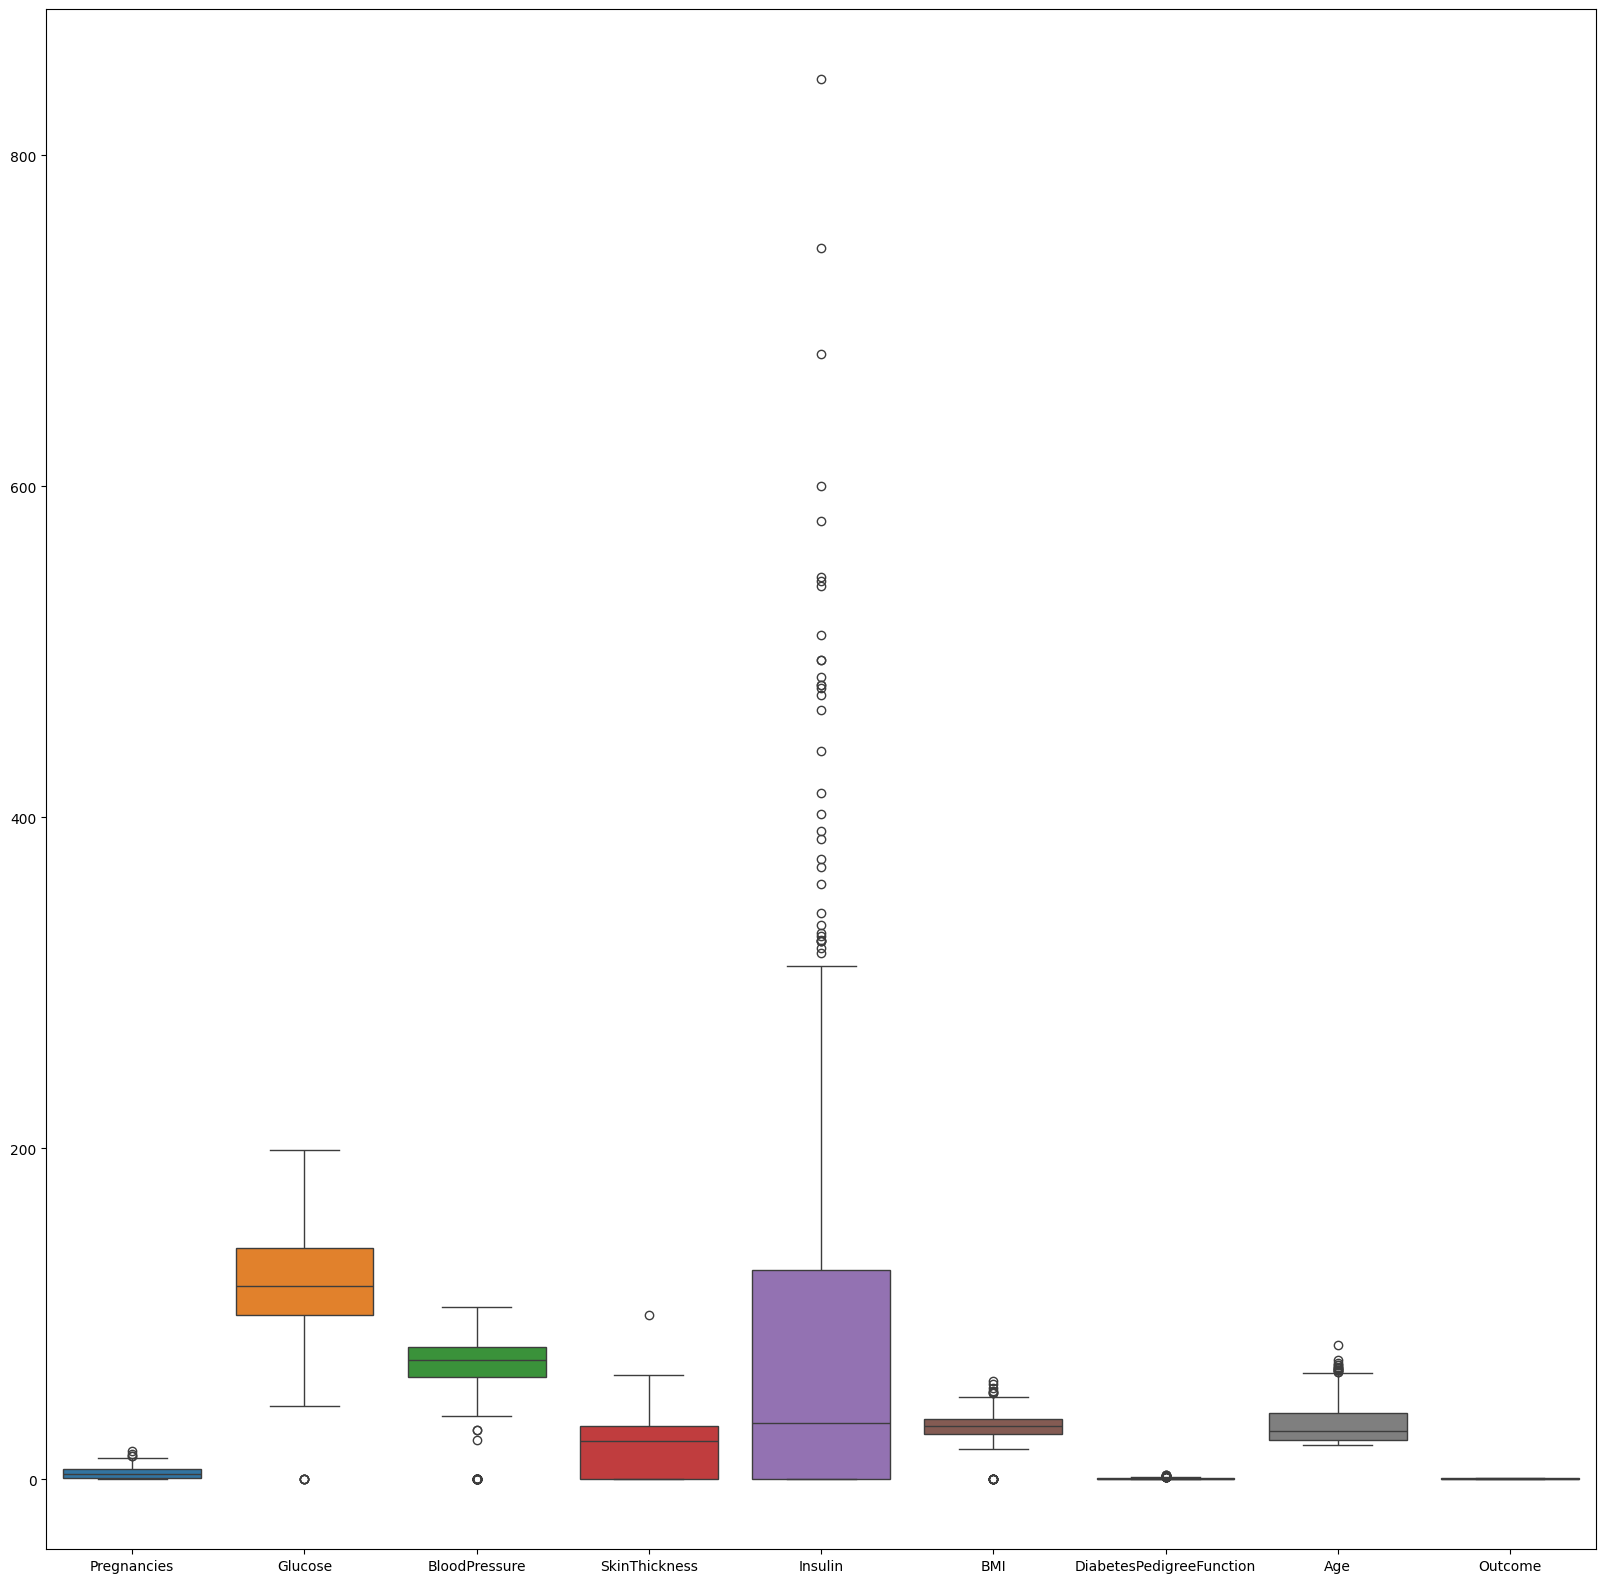

In [31]:
##To remove the Outliers in the Column 'Blood Pressure'

q=data['BloodPressure'].quantile(0.99)
new_data=data[data['BloodPressure']<q]
fig ,ax= plt.subplots(figsize =(20,20))
sns.boxplot(data=new_data,ax=ax)

In [32]:
new_data.shape

(758, 9)

##Feature Selection- Correlation heat map to find correlation between the features.

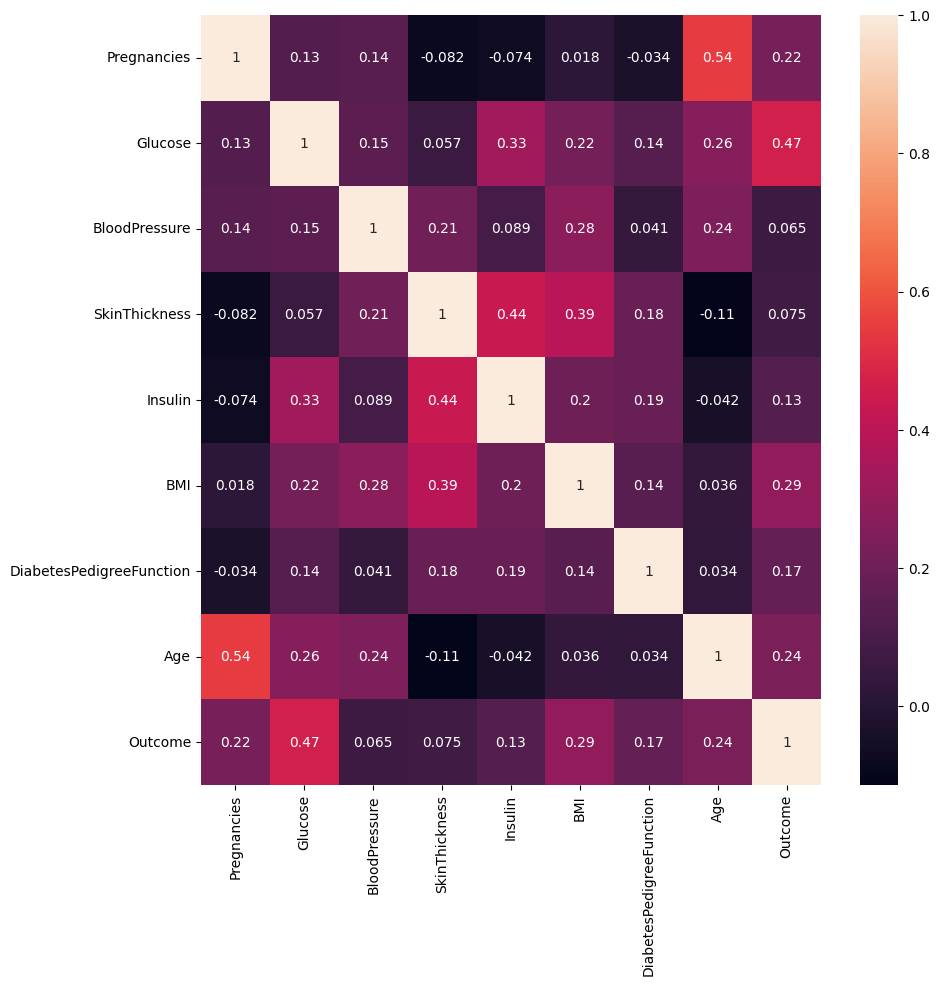

<Figure size 640x480 with 0 Axes>

In [33]:
fig ,ax= plt.subplots(figsize =(10,10))
ax=sns.heatmap(data.corr(),annot=True)
plt.show()
plt.savefig('heatmap.png')

Interview Question:

What if two features are highly correlated?

Ans ..We can one of the Feature and discard the other,because both the columns gives the same information.Hence retaining one column is better than the other.

Check the distribution of teh columns after deleting the Outliers...Syymetric or Non-Symmetric.

/tmp/ipython-input-4080507389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

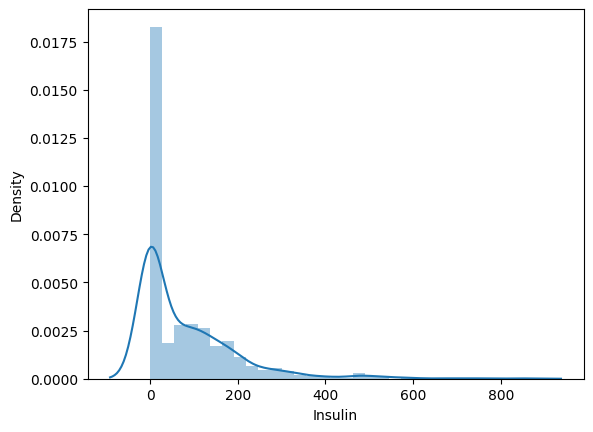

In [34]:
sns.distplot(data['Insulin'])

From the above figure ,we can conclude that it in Non_Symmetric Curve.--Right skewed .

Hence we need to do the Imputation for 'Insulin' column through 'mean'

To check whether the Records /Data is Balanced or Not?

In [35]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


From the above calculation we see that
For class '0' --500 counts
for class '1' -- 268

hence we see here that the data is imbalanced


To Resolve the Imbalanced data ,we use
 UnderSampling -- reduce the records that are higher
 Over Sampling ---Increase the records that have lower count.

Data Imputation for column 'Insulin'

In [38]:
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())

In [39]:
data['Insulin']

,Insulin
0,30.5
1,30.5
2,30.5
3,94.0
4,168.0
...,...
763,180.0
764,30.5
765,112.0
766,30.5


In [42]:
data.Insulin[data['Insulin']==0].value_counts()

,count
Insulin,


The above script shows that Insulin column does not contain any 'zeros ' ..henc ethe count value is blank.